### Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Initialize

In [2]:
# N: number of random samples
N = int(1e01)
# w: number of walks (or stocks)
w = 2

df = pd.DataFrame(data = np.random.rand(N, w)).add_prefix('rand_')
df

,rand_0,rand_1
0,0.418245,0.504618
1,0.624272,0.653498
2,0.034100,0.173264
3,0.247892,0.485944
4,0.605162,0.801340
5,0.593044,0.002761
6,0.079461,0.123520
7,0.709873,0.296446
8,0.700413,0.426537
9,0.232532,0.706027


### Use a for loop

In [3]:
for x in range(0, w):
    df['direction_' + str(x)] = np.where(df['rand_' + str(x)] > 0.5, +1, -1)
    df['cum_sum_' + str(x)] = df['direction_' + str(x)].cumsum()
df

,rand_0,rand_1,direction_0,cum_sum_0,direction_1,cum_sum_1
0,0.418245,0.504618,-1,-1,1,1
1,0.624272,0.653498,1,0,1,2
2,0.034100,0.173264,-1,-1,-1,1
3,0.247892,0.485944,-1,-2,-1,0
4,0.605162,0.801340,1,-1,1,1
5,0.593044,0.002761,1,0,-1,0
6,0.079461,0.123520,-1,-1,-1,-1
7,0.709873,0.296446,1,0,-1,-2
8,0.700413,0.426537,1,1,-1,-3
9,0.232532,0.706027,-1,0,1,-2


### Basic plotting

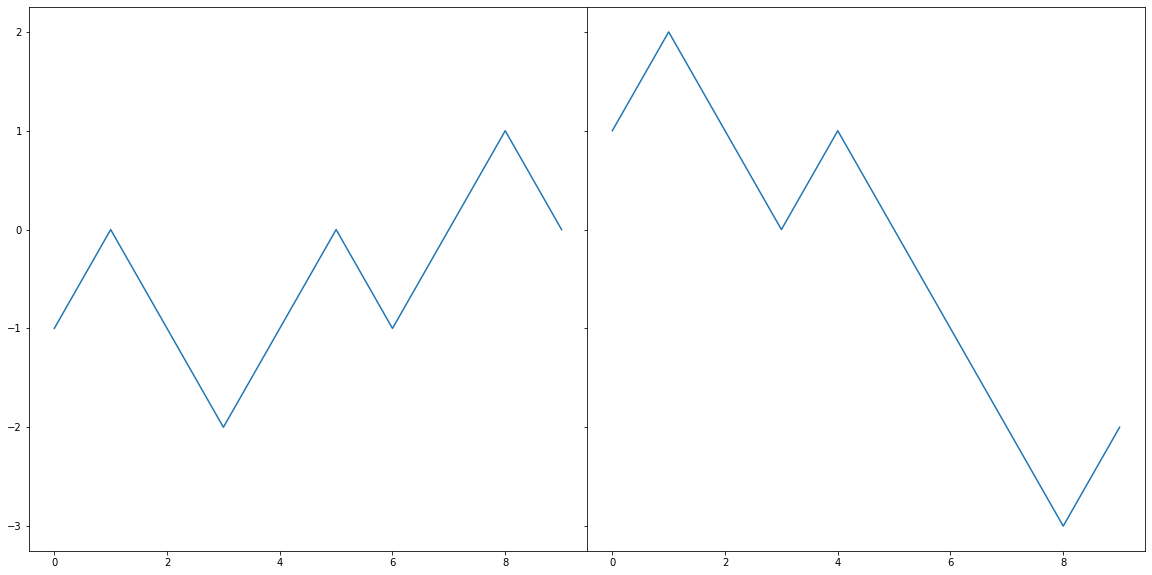

In [4]:
fig, axs = plt.subplots(1, w, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                        figsize = (20, 10))
for x in range(0, w):
    axs[x].plot(df.index, df['cum_sum_' + str(x)])